In [1]:
#! pip install vega_datasets

In [2]:
import pandas as pd
from vega_datasets import local_data

seattle = local_data.seattle_weather()
seattle.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [3]:
seattle['precip_lag'] = seattle['precipitation'].shift(1)
seattle.head()

,date,precipitation,temp_max,temp_min,wind,weather,precip_lag
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle,NaN
1,2012-01-02,10.9,10.6,2.8,4.5,rain,0.0
2,2012-01-03,0.8,11.7,7.2,2.3,rain,10.9
3,2012-01-04,20.3,12.2,5.6,4.7,rain,0.8
4,2012-01-05,1.3,8.9,2.8,6.1,rain,20.3


In [4]:
seattle['precip_lead'] = seattle['precipitation'].shift(-2)
seattle.tail()

,date,precipitation,temp_max,temp_min,wind,weather,precip_lag,precip_lead
1456,2015-12-27,8.6,4.4,1.7,2.9,fog,0.0,0.0
1457,2015-12-28,1.5,5.0,1.7,1.3,fog,8.6,0.0
1458,2015-12-29,0.0,7.2,0.6,2.6,fog,1.5,0.0
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun,0.0,NaN
1460,2015-12-31,0.0,5.6,-2.1,3.5,sun,0.0,NaN


In [5]:
seattle['precip_biweekly'] = seattle['precipitation'].rolling(14).mean()
seattle.head(14)

,date,precipitation,temp_max,temp_min,wind,weather,precip_lag,precip_lead,precip_biweekly
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle,NaN,0.8,NaN
1,2012-01-02,10.9,10.6,2.8,4.5,rain,0.0,20.3,NaN
2,2012-01-03,0.8,11.7,7.2,2.3,rain,10.9,1.3,NaN
3,2012-01-04,20.3,12.2,5.6,4.7,rain,0.8,2.5,NaN
4,2012-01-05,1.3,8.9,2.8,6.1,rain,20.3,0.0,NaN
5,2012-01-06,2.5,4.4,2.2,2.2,rain,1.3,0.0,NaN
6,2012-01-07,0.0,7.2,2.8,2.3,rain,2.5,4.3,NaN
7,2012-01-08,0.0,10.0,2.8,2.0,sun,0.0,1.0,NaN
8,2012-01-09,4.3,9.4,5.0,3.4,rain,0.0,0.0,NaN
9,2012-01-10,1.0,6.1,0.6,3.4,rain,4.3,0.0,NaN


<AxesSubplot:xlabel='date'>

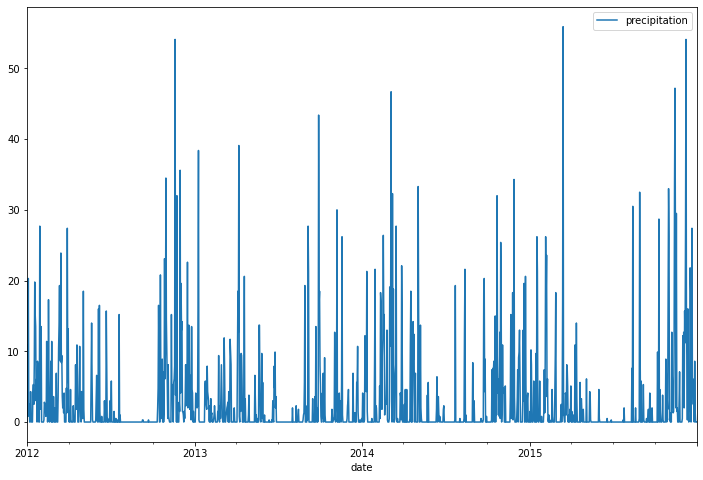

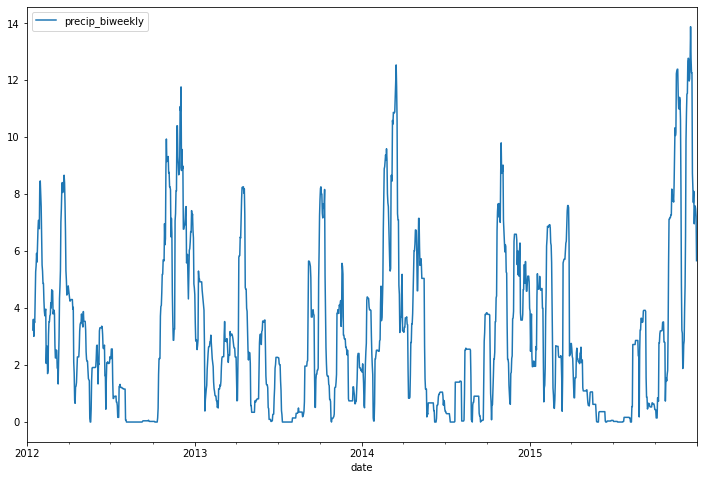

In [6]:
seattle.plot(x='date', y='precipitation',  figsize=(12, 8))
seattle.plot(x='date', y='precip_biweekly', figsize=(12, 8))